<a href="https://colab.research.google.com/github/JaredDRodriguez/Notebook_PDI_LAB/blob/main/AF3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retroalimentación del análisis y desarrollo del histograma

Importar librerias

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

Preprocesar imagen (cargar y convertir a grayscale)

In [ ]:
url = "https://github.com/dilp90/PDI/raw/main/Imagenes/ave.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img_color = cv2.imdecode(image, cv2.IMREAD_COLOR)

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

Calcular histograma

In [ ]:
hist_cv2 = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

hist_plt, bins = np.histogram(img_gray.ravel(), 256, [0, 256])

Visualizar imagenes e histogramas

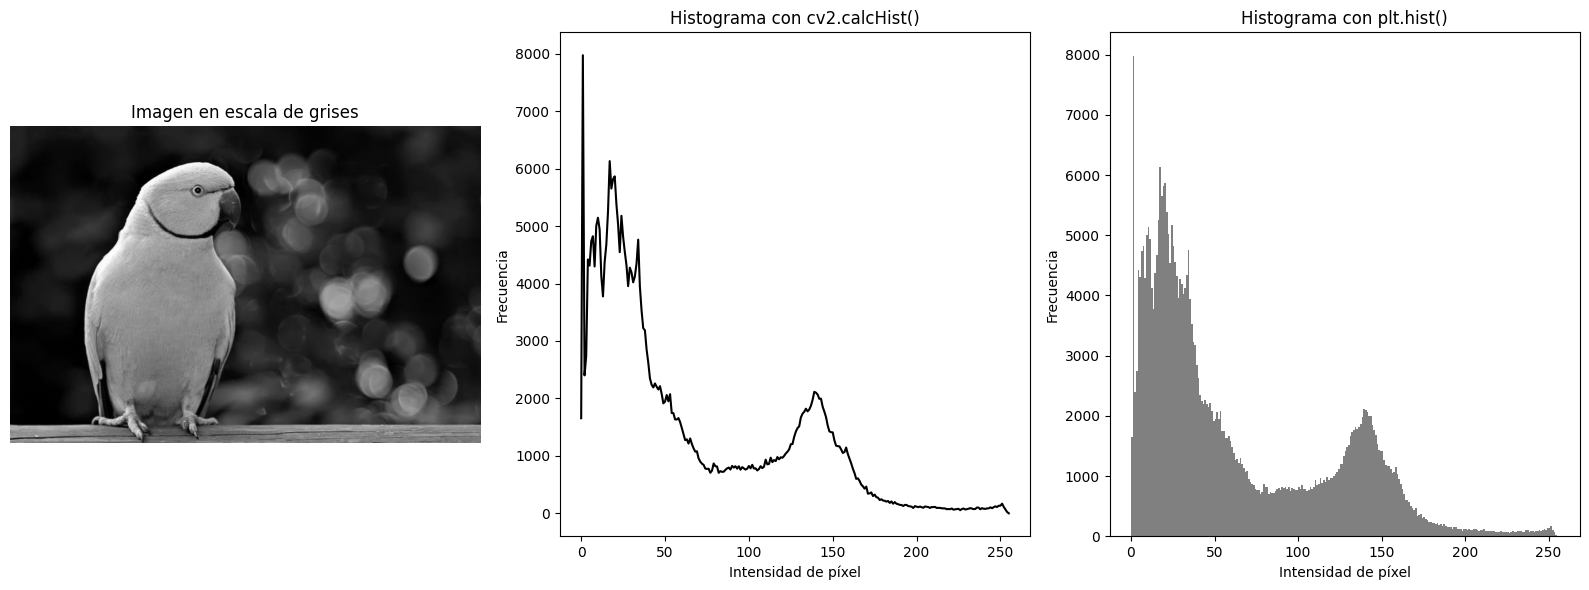

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen en escala de grises")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.plot(hist_cv2, color='black')
plt.title("Histograma con cv2.calcHist()")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")

plt.subplot(1, 3, 3)
plt.hist(img_gray.ravel(), bins=256, range=[0,256], color='gray')
plt.title("Histograma con plt.hist()")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()